# R Crawler rvest practice:  

## Satisfaction Rate of Movies in IMDb

In [246]:
# install showtext
library(rvest)
library(xml2)
library(igraph)
library(ggplot2)
library(showtext)

In [247]:
IMDb_movie_url <- read_html("http://www.imdb.com/list/ls058982125/?sort=user_rating,desc&st_dt=&mode=detail&page=1")

In [248]:
movie_name_list <- IMDb_movie_url %>%
  html_nodes(".lister-item-header a") %>%
  html_text()

In [249]:
length(movie_name_list)

[1] 100

In [250]:
movie_rate_list <- IMDb_movie_url %>% 
  html_nodes(".ratings-imdb-rating strong") %>%
  html_text() %>%
  as.numeric()

In [251]:
length(movie_rate_list)

[1] 100

In [252]:
movie_vote_list <- IMDb_movie_url %>%
  html_nodes(".text-muted+ span:nth-child(2)") %>%
  html_text() 
  as.numeric()

numeric(0)

In [253]:
movie_vote_list_revise <- movie_vote_list[4:103]

In [254]:
length(movie_vote_list_revise)

[1] 100

In [255]:
movie_time_list <- IMDb_movie_url %>% 
  html_nodes(".runtime") %>%
  html_text()

In [256]:
length(movie_time_list)

[1] 100

In [244]:
df_movie = data.frame(movie_name_list, movie_rate_list, movie_vote_list_revise, movie_time_list)

In [257]:
df_movie

movie_name_list,movie_rate_list,movie_vote_list_revise,movie_time_list
Coco,8.5,"130,673",105 min
Blade Runner 2049,8.1,"263,525",164 min
Paddington 2,8.1,"17,648",103 min
Logan,8.1,"460,394",137 min
Thor: Ragnarok,8.0,"270,827",130 min
Dunkirk,8.0,"366,012",106 min
Wind River,7.8,"108,518",107 min
Get Out,7.7,"279,178",104 min
Baby Driver,7.7,"278,392",112 min
Guardians of the Galaxy Vol. 2,7.7,"350,934",136 min


In [258]:
df_rate_only = data.frame(movie_name_list, movie_rate_list)

In [259]:
df_rate_select = df_rate_only[df_rate_only["movie_rate_list"] > 7.8, ]

In [260]:
df_rate_select

movie_name_list,movie_rate_list
Coco,8.5
Blade Runner 2049,8.1
Paddington 2,8.1
Logan,8.1
Thor: Ragnarok,8.0
Dunkirk,8.0


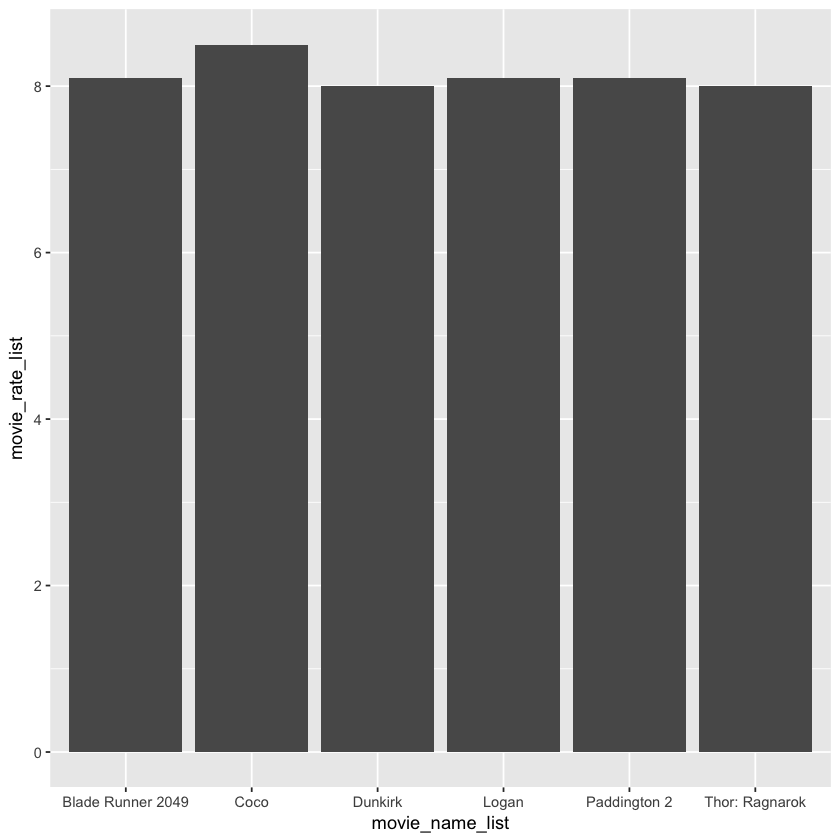

In [261]:
p <-ggplot(df_rate_select, aes(movie_name_list, movie_rate_list))
p +geom_bar(stat = "identity")

## Save movie_2017 into database

In [262]:
library("RSQLite")

In [263]:
drv <- dbDriver("SQLite")

In [264]:
conn <- dbConnect(drv,"movie.sqlite")

In [265]:
dbListTables(conn)

character(0)

In [267]:
dbWriteTable(conn, "Movies_2017", df_movie,row.names=FALSE,append=TRUE) 

In [268]:
dbDisconnect(conn)

In [269]:
drv <- dbDriver("SQLite")

In [270]:
conn <- dbConnect(drv,"movie.sqlite")

In [271]:
dbListTables(conn)

[1] "Movies_2017"

In [273]:
dbReadTable(conn,"Movies_2017")

movie_name_list,movie_rate_list,movie_vote_list_revise,movie_time_list
Coco,8.5,"130,673",105 min
Blade Runner 2049,8.1,"263,525",164 min
Paddington 2,8.1,"17,648",103 min
Logan,8.1,"460,394",137 min
Thor: Ragnarok,8.0,"270,827",130 min
Dunkirk,8.0,"366,012",106 min
Wind River,7.8,"108,518",107 min
Get Out,7.7,"279,178",104 min
Baby Driver,7.7,"278,392",112 min
Guardians of the Galaxy Vol. 2,7.7,"350,934",136 min


In [274]:
dbDisconnect(conn)

## Online example PTT 
#### Naming matters!! ==> readability

In [3]:
## normal usage
url.main <- 'https://www.ptt.cc/bbs/studyabroad/index.html'
href.title <- html_nodes(read_html(url.main), ".title a")
# store title urls for further searching
R.hrefs <- html_attr(href.title, 'href')
# store the title
R.title.txt <- html_text(href.title)

## using pipes
# url.main <- 'https://www.ptt.cc/bbs/studyabroad/index.html'
# R.hrefs <- url.main %>% read_html() %>% html_nodes(".title a") %>% html_attr('href')

In [4]:
for( i in R.title.txt){
    print(i)
}

[1] "[問題] uni-ass 文件影本認證及其它"
[1] "[情報] UCSD 2018新生情報"
[1] "Fw: [情報] 徵博士後研究員 歐洲IMEC 生醫電子相關"
[1] "[尋人] UC Berkeley Meng "
[1] "[問題] 固態領域適合出國讀PhD嗎"
[1] "[問題] 關於代辦"
[1] "[問題] 澳洲留學人數大增?"
[1] "[尋人] Duke University MQM MMS MBA"
[1] "[租屋] UCDavis 2018Fall客廳徵女室友"
[1] "[尋人] 北市圖留學資料中心徵求輔導老師"
[1] "[問題] 關於SCAD的 film program和名聲"
[1] "Re: [問題] 關於出國抉擇"
[1] "[選校] UVA Meng CE / Rutgers MS CS 要求3/16前決定"
[1] "[尋人] UChigo MPCS"
[1] "[問題] 推薦llm的自學書籍"
[1] "[情報] HKU MBA Admission Consultation(Taipei)"
[1] "[公告] 買賣書籍/禮券/團報/課程  請統一推文"
[1] "[公告] 留學板板規v2.2 (2015.07.26修改)"
[1] "[公告] 新手常見Q&A (不定時補完)"
[1] "Re: [情報] 留學版全文搜尋工具(持續更新)"
[1] "Re: [公告] 開放admission, rejection推文"


In [5]:
# form a empty vector
R.article.data <- c()

for(i in 1:length(R.hrefs)){
    # paste0() ==> without any white space
    article.url <- paste0('https://www.ptt.cc', R.hrefs[i])
    article <- html_nodes(read_html(article.url), "#main-content")
    article.content <- html_text(article)
    #  to convert a character vector between encodings: the ‘i’ stands for ‘internationalization’.
    article.utf8 <- iconv(article.content, 'utf8')
    # vector start counting from 1!!
    R.article.data <- c(R.article.data, article.utf8)
    # Suspend execution of R expressions for a specified time interval.
    # Sys.sleep(sample(3:5, 1))
}

In [6]:
R.article.data[1]

[1] "作者vivian2534 (棋子)看板studyabroad標題[問題] uni-ass 文件影本認證及其它時間Tue Mar 13 15:06:57 2018\n各位大大好，因為最近要開始申請德國的碩士，可是uni-ass複雜到我怕了很多文還是有\n一些點不清楚，希望有經驗的人可以幫幫我！\n\n1.因為我要申請的學校有些需要透過uni-ass,但是有的4/1截止，有的4/30，還有6/1號的\n，請我我付錢的時候是要先一次付完，還是可以分開付？\n如果分開付，這樣還有第一間75歐，之後第二次付只要15歐*學校數量嗎？\n\n如果ㄧ次付的話，那我比較後面申請的學校的動機信是不是可以晚一點再上傳跟郵寄呢？\n\n2.其實我爬很多文，有的人說只要繳交需要認證的文件即可，動機信、CV那些可以不用交\n，可是大部分申請的人還是統統繳了，我看uni-ass的流程也是寫把上述的全部文件寄給\n他們？這部分有人有經驗嗎？\n\n3.語言證明的認證\n我知道uni-ass可以接受雅思跟testdaf的成績不用認證，但是我剛好是考歌德的德文考試\n，而且學校要我們再申請時就提出B2的證書，請問我也得將B2證書彩色影印拿去德國在台\n協會影本認證嗎？\n\n4.網路上說公證都是去德國在台協會，但不知道為什麼，我今天早上準備好所有文件時，\n再double check價錢時，卻發現Daad taiwan的臉書出現這個：\nhttps://i.imgur.com/kMg1fER.jpg\n所以現在還可以去德國在台協會辦理嗎？\n\n5.最後一個是，因為我是要申請碩士學位，可是我在臺灣也有讀碩士，不過還沒畢業，今\n年6月才會畢業，不過我也申請了碩士的成績單跟在學證明，但我有請學校彌封，請問這\n樣我還是要影本認證這兩份文件嗎？ 因為碩士成績Gpa很高，希望放上去可以增加錄取的\n機率\n\n抱歉問題很多，再麻煩知道的人可以跟我說，我也同時寫信去問Uni-ass跟申請的學校等\n等..\n\n先跟撥冗讀我貼文的人說謝謝！！！\n\n--\n※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 101.14.50.54\n※ 文章網址: https://www.ptt.cc/bbs/studyabroad/M.1520924820.A.CA3.html\n推 a4839500: 1.可以一次付完，但請注意，第二間開始費用漲成30歐了 03/13 20:34\n推 a4839500: 2.我個人是繳交需要簽名、證書等。履歷和動機信不太需要 03/13 20:39\n→ a4839500: ，請放心，這種不用認證的文件可以另外補（email） 03/13 20:39\n推 a4839500: 3.這個問題我建議問學校 03/13 20:41\n→ a4839500: 4.他們會希望你先嘗試其他管道，我個人是採用民間公證人 03/13 20:43\n→ a4839500: 的方式，但是德協成績他們應該無法辦理，因為不是臺灣境 03/13 20:43\n→ a4839500: 內相關機構主辦的 03/13 20:43\n→ a4839500: 5. 認證歸認證，彌封歸彌封，如果學校有要求就要做！ 03/13 20:46\n→ vivian2534: 太感謝a大了 03/13 21:38\n"

## Login to Gmail (problem)

In [193]:
# create a session
gmail.url <- "https://accounts.google.com/signin/v2/identifier?hl=zh-TW&passive=true&continue=https%3A%2F%2Fwww.google.com.tw%2F%3Fgfe_rd%3Dcr%26dcr%3D0%26ei%3DC1upWvaXF8WiX7G7q9gD%26gws_rd%3Dssl&flowName=GlifWebSignIn&flowEntry=ServiceLogin"
gmail.session <- html_session(gmail.url)

In [194]:
gmail.session

<session> https://accounts.google.com/ServiceLogin?hl=zh-TW&passive=true&continue=https%3A%2F%2Fwww.google.com.tw%2F%3Fgfe_rd%3Dcr%26dcr%3D0%26ei%3DC1upWvaXF8WiX7G7q9gD%26gws_rd%3Dssl&flowName=GlifWebSignIn&flowEntry=ServiceLogin
  Status: 200
  Type:   text/html; charset=UTF-8
  Size:   73126

In [195]:
gmail.form <- html_form(gmail.session)[[1]]

In [196]:
gmail.form

<form> 'gaia_loginform' (POST https://accounts.google.com/signin/v1/lookup)
  <input hidden> 'Page': PasswordSeparationSignIn
  <input hidden> '': 
  <input hidden> 'gxf': AFoagUVukvFnZYIEQeAyWcZss41CXYdNHA:1521051143949
  <input hidden> 'continue': https://www.google.com.tw/?gfe_rd=cr&dcr=0&ei=C1upWvaXF8WiX7G7q9gD&gws_rd=ssl
  <input hidden> 'hl': zh-TW
  <input hidden> 'flowName': GlifWebSignIn
  <input hidden> 'flowEntry': ServiceLogin
  <input hidden> 'ProfileInformation': 
  <input hidden> 'SessionState': AEThLlwpITG7y4Z6_siiQLgNJTRk7SBrU0P82ebygaeqKrDqBsTd3sBGHdpH3WRBa--DWueBpXI7fS4enpHqf2RVBo3Lc8nEq8LpusKDGAh7ZJjEkxDg6qf0yhy60y2f7DnTMEpkRHLizhKbhOn5WQUAQ9AzbyWhrg
  <input hidden> '_utf8': ☃
  <input hidden> 'bgresponse': js_disabled
  <input email> 'Email': 
  <input password> '': 
  <input submit> 'signIn': 下一步

In [197]:
filled_form <- set_values(gmail.form, Email = "ntueeb05howard@gmail.com")

In [198]:
filled_form

<form> 'gaia_loginform' (POST https://accounts.google.com/signin/v1/lookup)
  <input hidden> 'Page': PasswordSeparationSignIn
  <input hidden> '': 
  <input hidden> 'gxf': AFoagUVukvFnZYIEQeAyWcZss41CXYdNHA:1521051143949
  <input hidden> 'continue': https://www.google.com.tw/?gfe_rd=cr&dcr=0&ei=C1upWvaXF8WiX7G7q9gD&gws_rd=ssl
  <input hidden> 'hl': zh-TW
  <input hidden> 'flowName': GlifWebSignIn
  <input hidden> 'flowEntry': ServiceLogin
  <input hidden> 'ProfileInformation': 
  <input hidden> 'SessionState': AEThLlwpITG7y4Z6_siiQLgNJTRk7SBrU0P82ebygaeqKrDqBsTd3sBGHdpH3WRBa--DWueBpXI7fS4enpHqf2RVBo3Lc8nEq8LpusKDGAh7ZJjEkxDg6qf0yhy60y2f7DnTMEpkRHLizhKbhOn5WQUAQ9AzbyWhrg
  <input hidden> '_utf8': ☃
  <input hidden> 'bgresponse': js_disabled
  <input email> 'Email': ntueeb05howard@gmail.com
  <input password> '': 
  <input submit> 'signIn': 下一步

In [231]:
# subnit form !!
submit_email_gmail <- submit_form(session = gmail.session, form = filled_form, submit='signIn')

In [232]:
submit_email_gmail

<session> https://accounts.google.com/signin/v1/lookup
  Status: 200
  Type:   text/html; charset=UTF-8
  Size:   73514

## Login to Github (problem)

In [217]:
github.url <- "https://github.com/login"
github.session <- read_html(github.url)

In [218]:
github.form <- html_form(github.session)[[1]]

In [219]:
github.form

<form> '<unnamed>' (POST /session)
  <input hidden> 'utf8': ✓
  <input hidden> 'authenticity_token': hQ9JWGsk7ExPispb7kfvMo7q//Yx8+xed64gKfoRnoacfe6YQbtO65x2sjktnfzfe9nEf6SJgZn2dy03lE8Lmw==
  <input text> 'login': 
  <input password> 'password': 
  <input submit> 'commit': Sign in

In [220]:
github_filled_form <- set_values(github.form, login = "ck1021051@gmail.com", password = "WhateverHoward123")

In [221]:
github_filled_form

<form> '<unnamed>' (POST /session)
  <input hidden> 'utf8': ✓
  <input hidden> 'authenticity_token': hQ9JWGsk7ExPispb7kfvMo7q//Yx8+xed64gKfoRnoacfe6YQbtO65x2sjktnfzfe9nEf6SJgZn2dy03lE8Lmw==
  <input text> 'login': ck1021051@gmail.com
  <input password> 'password': *****************
  <input submit> 'commit': Sign in

In [228]:
github.session$url = "https://github.com/login"
github_filled_form$url = ""
submit_github <- suppressWarnings(submit_form(session = github.session, form = github_filled_form))

Submitting with 'commit'
